<a href="https://colab.research.google.com/github/ghgit1798/2021-financial-competition/blob/Guhyeon/%EC%83%9D%ED%99%9C%EC%84%9C%EB%B9%84%EC%8A%A4%5Betc%5D_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [ ]:
sh = pd.read_csv('신한카드_업종대분류 전처리완료.csv', index_col=0, encoding='utf-8')

In [ ]:
sh.columns

Index(['기준년월', '광역시도명', '업종대분류', '업종중분류', '업종소분류', '신규가맹점수', '해지가맹점수',
       '매출가맹점수', '카드매출금액', '카드매출건수', '점당매출금액', '건당매출금액'],
      dtype='object')

In [ ]:
sh['업종대분류'].unique()

array(['문화레져', '생활서비스', '음식', '일반유통', '전문서비스', '종합유통', '기타'], dtype=object)

### 카테고리 재분류 필요성
- 따라서 **데이터의 카테고리 재분류가 필요**할 수 있다.
- 개인교통: 교통관련 카테고리인 연료, 자동차정비, 자동차-기타, 수리점
- 일반교통: 대중교통, 택시, 터널/유료도로/하이패스
- 특수교통: 항공, 철도, 화물운송업, 여객선
- 월납/세금: 월납/세금
- 그 외 서비스: 사회단체, 세탁소, 사진, 농기구, 기계/장비 대여, 열쇠/도장 등

In [ ]:
sh = sh[sh['업종대분류'].str.contains('생활서비스')]

In [ ]:
sh['업종중분류'].unique()

array(['기계/장비 대여', '농기구', '대중교통', '미용/사우나/마사지', '사진', '사회단체', '세탁소',
       '수리점', '여객선', '연료', '열쇠/도장', '월납/세금', '자동차-기타', '자동차정비', '철도',
       '택시', '항공', '화물운송업', '터널/유료도로/하이패스'], dtype=object)

In [ ]:
personal_transport = sh[sh['업종중분류'].str.contains('연료|자동차-기타|자동차정비|수리점')]
public_transport = sh[sh['업종중분류'].str.contains('대중교통|택시|터널/유료도로|하이패스')]
special_transport = sh[sh['업종중분류'].str.contains('항공|철도|화물운송업|여객선')]
etc = sh[sh['업종중분류'].str.contains('사회단체|세탁소|사진|농기구|기계/장비 대여|열쇠/도장')]
tax = sh[sh['업종중분류'].str.contains('월납/세금')]

In [ ]:
sh = etc

In [ ]:
sh['업종소분류'].unique()

array(['건설장비 대여', '생활장비 대여', '정밀기기 대여', '중장비 대여', '농기구/자재', '농약', '종묘사업',
       '사진관', '사진기/광학제품', '복지시설', '사회단체', '조합/협회', '종교단체', '지방자치단체',
       '세탁소', '특수세탁', '도장', '열쇠', '주민자치센터', '정치단체'], dtype=object)

In [ ]:
sh

,기준년월,광역시도명,업종대분류,업종중분류,업종소분류,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
62,201903,강원,생활서비스,기계/장비 대여,건설장비 대여,0,0,2,4054000,81,2026860,50046
63,201903,강원,생활서비스,기계/장비 대여,생활장비 대여,0,0,1,198000,3,198000,66000
64,201903,강원,생활서비스,기계/장비 대여,정밀기기 대여,4,10,147,72833000,2015,495464,36145
65,201903,강원,생활서비스,기계/장비 대여,중장비 대여,0,0,1,350000,1,349570,349570
66,201903,강원,생활서비스,농기구,농기구/자재,11,6,238,248173000,3284,1042743,75570
...,...,...,...,...,...,...,...,...,...,...,...,...
23641,202009,충북,생활서비스,사회단체,주민자치센터,0,0,1,74000,47,73600,1566
23642,202009,충북,생활서비스,세탁소,세탁소,6,3,625,247873000,14960,396597,16569
23643,202009,충북,생활서비스,세탁소,특수세탁,0,0,4,4516000,32,1129000,141125
23651,202009,충북,생활서비스,열쇠/도장,도장,0,0,9,1571000,51,174522,30798


In [ ]:
group = sh.groupby(by='업종소분류').sum().reset_index()
group.drop(columns='기준년월', inplace=True)
group

,업종소분류,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,건설장비 대여,0,0,206,674231000,2759,171134640,13939690
1,농기구/자재,241,101,15278,17611714000,259030,93135673,4973392
2,농약,0,6,2662,2269957000,53108,79334415,7524341
3,도장,0,0,433,95484000,3120,11755852,2014288
4,복지시설,3,3,510,418434000,10331,62518207,6135933
5,사진관,451,299,23921,19374511000,391228,47017823,3449565
6,사진기/광학제품,15,12,1612,3617966000,28226,98060304,7483290
7,사회단체,127,41,6916,30696092000,220675,147303402,6599432
8,생활장비 대여,0,0,51,589176000,16902,105855949,2868130
9,세탁소,1043,643,62593,34822997000,1993776,34265284,1303624


In [ ]:
group = group[group['매출가맹점수']!=0]
group = group[group['카드매출건수']!=0]

In [ ]:
# 점당매출금액, 건당매출금액 재계산
group['점당매출금액'] = group['카드매출금액']//group['매출가맹점수']
group['건당매출금액'] = group['카드매출금액']//group['카드매출건수']

In [ ]:
vcols = ['매출가맹점수', '카드매출금액', '카드매출건수', '점당매출금액', '건당매출금액']

In [ ]:
# 표준화 수행
cls = group[vcols]
cols = cls.columns
scaler = StandardScaler()
scaler.fit(cls)
scaled = scaler.transform(cls)
scaled

array([[-0.54127033, -0.69977469, -0.48695641,  0.47252994,  3.12503423],
       [ 0.50535084,  0.67427455,  0.07971031, -0.36295827,  0.03967163],
       [-0.37072219, -0.5703218 , -0.37562465, -0.48118469, -0.40199157],
       [-0.52550713, -0.7467254 , -0.48615817, -0.73031163, -0.61433065],
       [-0.52016014, -0.72052616, -0.4702132 , -0.49390015, -0.44117433],
       [ 1.10553309,  0.81728103,  0.37202667, -0.49804603, -0.28339374],
       [-0.44363569, -0.46096489, -0.43064375,  0.06721344,  1.09248094],
       [-0.07531836,  1.73574157, -0.00510031,  0.93178508,  1.28353189],
       [-0.55203375, -0.70667476, -0.4556834 ,  3.73513368, -0.53990089],
       [ 3.79097192,  2.07053575,  3.9155826 , -0.59797793, -0.84414454],
       [ 0.24952863, -0.45272635, -0.27844899, -0.6907888 , -0.47929006],
       [ 0.20001689,  0.49535681, -0.02926653, -0.25926745,  0.13517961],
       [ 0.17342082,  2.19796482,  1.06059028,  0.54888574, -0.24361624],
       [-0.32259928,  0.03451675, -0.0

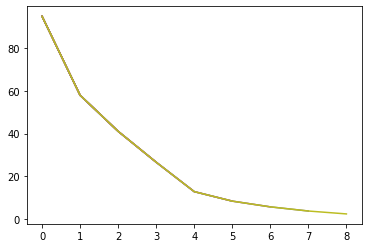

In [ ]:
# screeplot 그리기
def elbow(x):
  sse = []

  for i in range(1, 10):
    km = KMeans(n_clusters=i)
    km.fit(x)
    sse.append(km.inertia_)
    plt.plot(sse)
  plt.show()

elbow(scaled)

In [ ]:
# cluster 수는 2개로 결정
km = KMeans(n_clusters=3)
km.fit(scaled)
km.cluster_centers_

array([[-0.43845963, -0.6147042 , -0.41488793,  0.0182753 , -0.00670989],
       [ 3.79097192,  2.07053575,  3.9155826 , -0.59797793, -0.84414454],
       [ 0.38180066,  1.18412376,  0.29559209,  0.07207981,  0.18627463]])

In [ ]:
cluster = pd.DataFrame(km.cluster_centers_, columns=cls.columns)
cluster

,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,-0.438460,-0.614704,-0.414888,0.018275,-0.006710
1,3.790972,2.070536,3.915583,-0.597978,-0.844145
2,0.381801,1.184124,0.295592,0.072080,0.186275


In [ ]:
predict = pd.DataFrame(km.predict(scaled))
predict.columns = ['클러스터']
predict

,클러스터
0,0
1,2
2,0
3,0
4,0
5,2
6,0
7,2
8,0
9,1


In [ ]:
scaled = pd.DataFrame(data=scaled, columns=cls.columns)
scaled

,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,-0.541270,-0.699775,-0.486956,0.472530,3.125034
1,0.505351,0.674275,0.079710,-0.362958,0.039672
2,-0.370722,-0.570322,-0.375625,-0.481185,-0.401992
3,-0.525507,-0.746725,-0.486158,-0.730312,-0.614331
4,-0.520160,-0.720526,-0.470213,-0.493900,-0.441174
5,1.105533,0.817281,0.372027,-0.498046,-0.283394
6,-0.443636,-0.460965,-0.430644,0.067213,1.092481
7,-0.075318,1.735742,-0.005100,0.931785,1.283532
8,-0.552034,-0.706675,-0.455683,3.735134,-0.539901
9,3.790972,2.070536,3.915583,-0.597978,-0.844145


In [ ]:
names = pd.DataFrame(group['업종소분류'])
names.reset_index(inplace=True, drop=True)
names

,업종소분류
0,건설장비 대여
1,농기구/자재
2,농약
3,도장
4,복지시설
5,사진관
6,사진기/광학제품
7,사회단체
8,생활장비 대여
9,세탁소


In [ ]:
# names와 결합
result = pd.concat([scaled, names], axis=1)
result = pd.concat([result, predict], axis=1)
result

,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액,업종소분류,클러스터
0,-0.541270,-0.699775,-0.486956,0.472530,3.125034,건설장비 대여,0
1,0.505351,0.674275,0.079710,-0.362958,0.039672,농기구/자재,2
2,-0.370722,-0.570322,-0.375625,-0.481185,-0.401992,농약,0
3,-0.525507,-0.746725,-0.486158,-0.730312,-0.614331,도장,0
4,-0.520160,-0.720526,-0.470213,-0.493900,-0.441174,복지시설,0
5,1.105533,0.817281,0.372027,-0.498046,-0.283394,사진관,2
6,-0.443636,-0.460965,-0.430644,0.067213,1.092481,사진기/광학제품,0
7,-0.075318,1.735742,-0.005100,0.931785,1.283532,사회단체,2
8,-0.552034,-0.706675,-0.455683,3.735134,-0.539901,생활장비 대여,0
9,3.790972,2.070536,3.915583,-0.597978,-0.844145,세탁소,1


In [ ]:
# cluster labeling
# 0번 클러스터는 가맹점수, 매출건수가 크지만 건당,점당매출은 작은 편의점 같은 산업들이 해당된다.
# 1번 클러스터는 가맹점수, 매출건수는 작지만 건당,점당매출이 큰 유통, 전문서비스 등 음식을 제외한 산업이 해당된다.
cluster

,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,-0.438460,-0.614704,-0.414888,0.018275,-0.006710
1,3.790972,2.070536,3.915583,-0.597978,-0.844145
2,0.381801,1.184124,0.295592,0.072080,0.186275


In [ ]:
def show_cluster(result, name):
  categories = cols
  color = ['skyblue', 'blue', 'salmon', 'green', 'orange']

  target = result[result['업종소분류']==name]

  fig = go.Figure()

  fig.add_trace(go.Scatterpolar(
      r = cluster.values[0],
      theta = categories,
      fill='toself',
      name='Cluster0',
      line_color=color[0]
  ))

  fig.add_trace(go.Scatterpolar(
      r = cluster.values[1],
      theta = categories,
      fill='toself',
      name='Cluster1',
      line_color=color[1]
  ))

  fig.add_trace(go.Scatterpolar(
      r = cluster.values[2],
      theta = categories,
      fill='toself',
      name='Cluster2',
      line_color=color[2]
  ))

  fig.add_trace(go.Scatterpolar(
      r = target.values[0],
      theta = categories,
      fill='toself',
      name=name,
      line_color=color[4]
  ))

  # fig.add_trace(go.Scatterpolar(
  #     r = cluster.values[3],
  #     theta = categories,
  #     fill='toself',
  #     name='Cluster3',
  #     line_color=color[3]
  # ))

  # fig.add_trace(go.Scatterpolar(
  #     r = target.values[0],
  #     theta = categories,
  #     fill='toself',
  #     name=name,
  #     line_color=color[4]
  # ))

  fig.update_layout(
    polar=dict(
      radialaxis=dict(
        title=str(target['클러스터']),
        visible=True,
      )),
  )
  print(name, target['클러스터'])
  fig.show()

# 클라우드 맥주 클러스터링 결과
# show_cluster(result, '편의점')

In [ ]:
# StandardScaler, MinMaxScaler 사용 시 Outlier에 굉장히 민감함.
for col in sh['업종소분류'].unique():
  show_cluster(result, col)

건설장비 대여 0    0
Name: 클러스터, dtype: int32


생활장비 대여 8    0
Name: 클러스터, dtype: int32


정밀기기 대여 11    2
Name: 클러스터, dtype: int32


중장비 대여 16    0
Name: 클러스터, dtype: int32


농기구/자재 1    2
Name: 클러스터, dtype: int32


농약 2    0
Name: 클러스터, dtype: int32


종묘사업 14    0
Name: 클러스터, dtype: int32


사진관 5    2
Name: 클러스터, dtype: int32


사진기/광학제품 6    0
Name: 클러스터, dtype: int32


복지시설 4    0
Name: 클러스터, dtype: int32


사회단체 7    2
Name: 클러스터, dtype: int32


조합/협회 12    2
Name: 클러스터, dtype: int32


종교단체 13    0
Name: 클러스터, dtype: int32


지방자치단체 17    0
Name: 클러스터, dtype: int32


세탁소 9    1
Name: 클러스터, dtype: int32


특수세탁 18    0
Name: 클러스터, dtype: int32


도장 3    0
Name: 클러스터, dtype: int32


열쇠 10    0
Name: 클러스터, dtype: int32


주민자치센터 15    0
Name: 클러스터, dtype: int32


IndexError: ignored

### 결과
1. 여객선, 콜백, 퀵배달 은 공통된 특징을 갖고 같은 클러스터로 분류됨
2. 철도/항공사/종합이삿짐대행 서비스는 각각 개별분류
3. 택배업과 화물운송 분류는 유사한 특징을 갖고 같은 클러스터로 분류됨